$\textbf{QUESTION 2.1}$

1) The function that does what is required for this question is named 'traverse' and is provided in "worksheet2functions.jl".

2) The function that does what is required for this question is named 'search' and is provided in "worksheet2functions.jl".

3) A graph which shows the relationship between the time taken to compute the search and the length of the list is provided in one of the cells below.


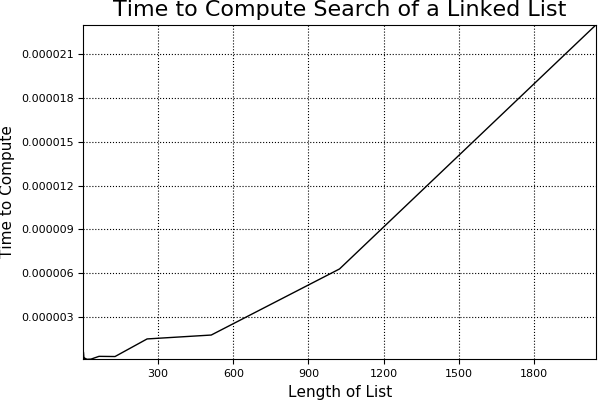

In [86]:
using Plots
pyplot()

include("kvpair.jl")
#include("llist.jl")
#include("ftree.jl")
include("worksheet2functions.jl")

n = 11

X = 2.^(1:n)
Y = zeros(length(X))
k = 1

for i in X
    Xl = rand(i)
    x = rand(1:i)
    values = Array{KVPair}(i)
    for j =1:i
        values[j] = KVPair(j,Xl[j])
    end
    L = buildLList(values)
    search(L,x)
    t = @timed search(L,x)
    Y[k] = t[2]
    k += 1
end
    
plot(X,Y,legend = false, color = "black")
xlabel!("Length of List")
ylabel!("Time to Compute")
title!("Time to Compute Search of a Linked List", titlefont = font(16))

$\textbf{QUESTION 2.2}$

1) In this question we use the code provided in order to construct a Nullable Linked List.

In [72]:
seed = 1235 
rng = MersenneTwister(seed)
n=15
X = rand(rng, n)
# Now calculate the array of partial sums

values = Array{KVPair}(n)

for j =1:n
    values[j] = KVPair(j,cumsum(X)[j])
end

L = Nullable{LList}()
L = buildLList(values)

Nullable{LList}(LList(KVPair(1,0.0951588),LList(KVPair(2,0.366057),LList(KVPair(3,1.27237),LList(KVPair(4,2.10596),LList(KVPair(5,3.05101),LList(KVPair(6,3.49468),LList(KVPair(7,4.39926),LList(KVPair(8,5.34086),LList(KVPair(9,5.37845),LList(KVPair(10,6.37453),LList(KVPair(11,6.61334),LList(KVPair(12,6.79405),LList(KVPair(13,7.42495),LList(KVPair(14,7.69313),LList(KVPair(15,8.41251),#NULL))))))))))))))))

2) The Linear Search Interval Membership function in question is provided in worksheet2functions.jl and is called 'intervalmembership'. To show that this function works as intended, we've applied the intervalmembership function on the Nullable Linked List created in the last question.

In [11]:
intervalmembership(L,2.0)

KVPair(4,2.1059565816183605)

In [12]:
intervalmembership(L,9.0)

Nullable{KVPair}()

A graph showing the relationship between the time taken to compute the "intervalmembership" function and the length of the list. In order to carry out this function when the lists are large we've decided to focus on lists of length $2^n$ where $n$ is a natural number greater than zero.


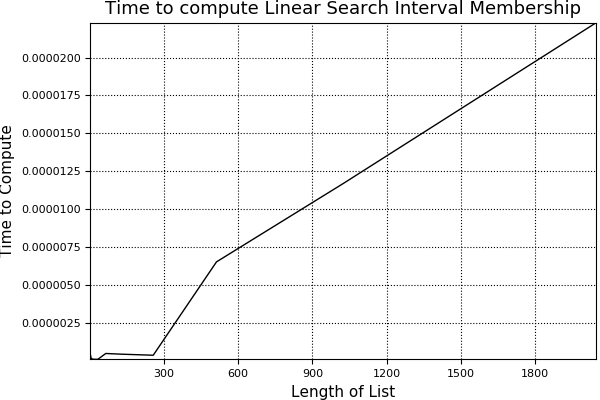

In [83]:
n = 11
Xd = 2.^(1:n)
Yd = zeros(length(Xd))

k = 1
for i in Xd
    Xs = rand(rng, i);
    S = zeros(length(Xd))
    Ps = cumsum(Xs)
    values = Array{KVPair}(i)
    for j =1:i
        values[j] = KVPair(j,Ps[j])
    end
    L = buildLList(values)
    x=rand(rng)*Ps[i]
    tmp = intervalmembership(L,x)
    t = @timed intervalmembership(L,x)
    Yd[k] = t[2]
    k += 1
end

plot(Xd,Yd,legend = false,color = "black")
xlabel!("Length of List")
ylabel!("Time to Compute")
title!("Time to compute Linear Search Interval Membership", titlefont = font(13))

3) The Fenwick Tree Interval Membership function in question is provided in worksheet2functions.jl and is called 'intervalmembership2'. To show that this function works as intended, we've applied the intervalmembership function on the Nullable Linked List created in the last question.

In [75]:
n=15
X = rand(rng, n)

values = Array{KVPair}(n)
for i in 1:n
    values[i] = KVPair(i,X[i])
end
T = Nullable{FTree}(FTree(KVPair(0,0.0)))
T = buildFTree(T, values)

Nullable{FTree}(FTree(KVPair(-1,7.04243),FTree(KVPair(-1,3.39674),FTree(KVPair(-1,1.41065),FTree(KVPair(1,0.748725),#NULL,#NULL),FTree(KVPair(-1,0.661924),FTree(KVPair(2,0.542957),#NULL,#NULL),FTree(KVPair(3,0.118967),#NULL,#NULL))),FTree(KVPair(-1,1.9861),FTree(KVPair(-1,1.45911),FTree(KVPair(4,0.915266),#NULL,#NULL),FTree(KVPair(5,0.543844),#NULL,#NULL)),FTree(KVPair(-1,0.526986),FTree(KVPair(6,0.371611),#NULL,#NULL),FTree(KVPair(7,0.155375),#NULL,#NULL)))),FTree(KVPair(-1,3.64569),FTree(KVPair(-1,1.54616),FTree(KVPair(-1,0.904628),FTree(KVPair(8,0.195176),#NULL,#NULL),FTree(KVPair(9,0.709453),#NULL,#NULL)),FTree(KVPair(-1,0.64153),FTree(KVPair(10,0.191636),#NULL,#NULL),FTree(KVPair(11,0.449893),#NULL,#NULL))),FTree(KVPair(-1,2.09953),FTree(KVPair(-1,1.26132),FTree(KVPair(12,0.279771),#NULL,#NULL),FTree(KVPair(13,0.981545),#NULL,#NULL)),FTree(KVPair(-1,0.838212),FTree(KVPair(14,0.181679),#NULL,#NULL),FTree(KVPair(15,0.656534),#NULL,#NULL))))))

In [76]:
intervalmembership2(T,2.0)

KVPair(4,0.9152659131753842)

A graph showing the relationship between the log of the time taken to compute the "intervalmembership2" function and the length of the list. In order to carry out this function when the lists are large we've decided to focus on lists of length $2^n$ where $n$ is a natural number greater than zero. Given that the values on the axes on the y-axis are negative, the time taken to compute intervalmembership2 is less than 1 second even when the length of the list is 30000. Therefore the Fenwick Tree Search Interval Membership is most definitely quicker than the Linear Search Interval Membership. We can also deduce graphically that the Fenwick Tree Search Interval Membership computes with complexity $O(\log(n))$.


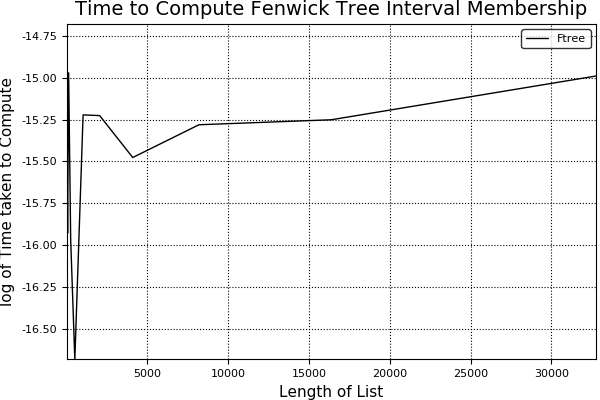

In [77]:
k = 1
X2 = 2.^(1:n)
Y2 = zeros(length(X2))

for i in X2
    Xs = rand(rng, i);
    S = zeros(length(X2))
    Ps = cumsum(Xs)
    values = Array{KVPair}(i)
    for j =1:i
        values[j] = KVPair(j,Ps[j])
    end
    L = buildLList(values)
    x=rand(rng)*Ps[i]
    tmp = intervalmembership2(T,x)
    t = @timed intervalmembership2(T,x)
    Y2[k] = t[2]
    k += 1
end

plot(X2,log.(Y2),label = "Ftree",color="black")
title!("Time to Compute Fenwick Tree Interval Membership")
ylabel!("log of Time taken to Compute")
xlabel!("Length of List")

$\textbf{QUESTION 2.3}$

Here we modify the Gilespie Algorithm such that each particle has rates which are randomly generated from an exponential distribution with mean $D$. In parts 1 and 2 we modify the algorithm further by using 'intervalmembership' and 'intervalmembership2' respectively in order to randomly select a particle. In each case a plot is provided and is compared to an analytical solution that will be derived in part 3 of this question.

1) A Stochastic Simulation via Linear Search Interval Membership under the Gilespie Algorithm is provided in a graph below. The highest number of particles that can be provided such that the running time of the Gilespie Algorithm is reasonable is $N = 1000$. 

(We also observe generally that as we increase N, the analytical solution derived in part 3 of this question approximates the empirical solution with greater accuracy. This is also the case for the stochastic simulation in part 2.)


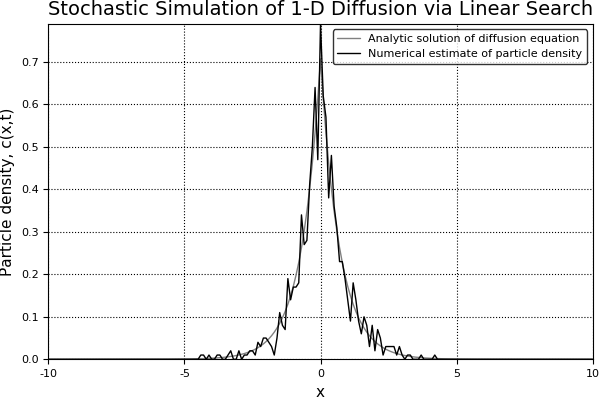

In [66]:
using Plots
using Distributions

# Calculation of rates.

L=10.0
N=1000
Nx = 201
dx = 2.0*L/(Nx-1)
X = dx.*(-(Nx-1)/2:(Nx-1)/2)
Y = zeros(Int64,N)
t=0.0
D = 1.0

D1 = D*randexp(N)
D1 = vcat(D1,D1)

r = (D1/2.0)./(dx*dx)
totalRate = sum(r)
dt = 1.0/totalRate
T=1.0

# Building a Nullable Linked List.

values = Array{KVPair}(2*N)

for i=1:2*N
    values[i] = KVPair(i,cumsum(r)[i])
end

a = buildLList(values)

# Carrying out the Gilespie Algorithm using intervalmembership to make select a random key.

while t < T
    k = intervalmembership(a,rand(Uniform(0,totalRate))).key
    if k <= N
        hop = 1
        particleId = k
        Y[particleId]+=hop
        t+=dt
    else
        hop = -1
        particleId=k-N
        Y[particleId]+=hop
        t+=dt
    end
end

P =zeros(Float64,length(X))

for i in 1:length(Y)
    P[Y[i]+Int64((Nx-1)/2)+1]+=1/(N * dx)
end

P1 = normalnew.(X, D, T)

plot(X, P1, label="Analytic solution of diffusion equation",color = "grey")
plot!(X, P, label="Numerical estimate of particle density",color = "black")
xlabel!("x")
ylabel!("Particle density, c(x,t)")
title!("Stochastic Simulation of 1-D Diffusion via Linear Search")

2) A Stochastic Simulation via Fenwick Tree Interval Membership under the Gilespie Algorithm is provided in a graph below. The highest number of particles that can be provided such that the running time of the Gilespie Algorithm is reasonable is $N = 100$.


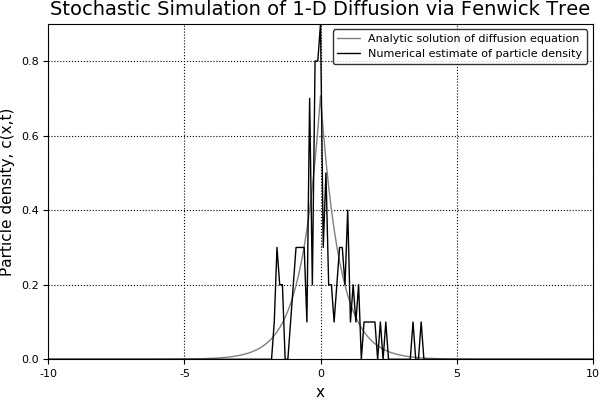

In [67]:
# Calculation of Rates.

L=10.0
N=100
Nx = 201
dx = 2.0*L/(Nx-1)
X = dx.*(-(Nx-1)/2:(Nx-1)/2)
Y = zeros(Int64,N)
t=0.0
D = 1.0

D1 = D*randexp(N)
D1 = vcat(D1,D1)

r = (D1/2.0)./(dx*dx)
totalRate = sum(r)
dt = 1.0/totalRate
T=1.0

# Building a Fenwick Tree.

values = Array{KVPair}(2*N)
for i in 1:2*N
    values[i] = KVPair(i,r[i])
end

b = Nullable{FTree}(FTree(KVPair(0,0.0)))
b = buildFTree(b, values)

# Carrying out the Gilespie Algorithm using intervalmembership2 to make select a random key.

Ynew = zeros(Int64,N)

while t < T
    k = intervalmembership2(b,rand(Uniform(0,totalRate))).key
    if k <= N
        hop = 1
        particleId = k
        Ynew[particleId]+=hop
        t+=dt
    else
        hop = -1
        particleId=k-N
        Ynew[particleId]+=hop
        t+=dt
    end
end

Pnew =zeros(Float64,length(X))

for i in 1:length(Ynew)
    Pnew[Ynew[i]+Int64((Nx-1)/2)+1]+=1/(N * dx)
end


P1 = normalnew.(X, D, T)

plot(X, P1, label="Analytic solution of diffusion equation",color = "grey")
plot!(X, Pnew, label="Numerical estimate of particle density",color = "black")
xlabel!("x")
ylabel!("Particle density, c(x,t)")
title!("Stochastic Simulation of 1-D Diffusion via Fenwick Tree")

3) In this question, we would like to solve $\frac{dc}{dt} = D\frac{d^2c}{dx^2}$ where $x \in [-L,L]$ in the limit as $L \rightarrow \infty$ with initial condition $c(x,0) = \delta (x)$ and $c(\pm \infty , t) = 0$.

The given solution to this problem is
$$c(x,t) = \frac{1}{\sqrt{2\pi Dt}}\exp\Big({-\frac{x^{2}}{2Dt}}\Big)$$
where $D$ is some specified diffusion constant.

$$<c(x,t)> = \int^{\infty}_{0} \frac{1}{D}\exp\Big(-\frac{y}{D} \Big)\frac{1}{\sqrt{2\pi yt}}\exp\Big({-\frac{x^{2}}{2yt}\Big)}dy = \frac{1}{D\sqrt{2\pi t}}\int^{\infty}_{0}\frac{\exp\Big(-\frac{y}{D} - \frac{x^{2}}{2yt}\Big)}{\sqrt{y}}dy$$

Let $w^{2} = y$. Then $2wdw = dy$.

$$\therefore \: <c(x,t)> = \frac{2}{D\sqrt{2\pi t}}\int^{\infty}_{0} \exp\Big({-\frac{w^2}{D} - \frac{x^{2}}{2w^2t}}\Big)dw = \frac{2}{D\sqrt{2\pi t}}\frac{1}{2}\sqrt{D\pi}\exp\Big({-2\sqrt{\frac{x^2}{2Dt}}}\Big)$$

$$ <c(x,t)> = \frac{1}{\sqrt{2Dt}}\exp \Big( \pm \sqrt{\frac{2}{Dt}}x \Big) $$
where the partity in the above formula is yet to be specified.

When $x > 0$, we require a minus sign in the above solution in order to satisfy the boundary condition $c(\infty,t) = 0$. However when $x < 0$, we require a plus sign in the above solution in order to satisfy the other boundary condition $c(-\infty,t) = 0$. Our solution for $<c(x,t)>$ therefore because

$$ <c(x,t)> = \frac{1}{\sqrt{2Dt}}\exp \left( -\sqrt{\frac{2}{Dt}} |x| \right). $$

What is left is to check whether this solution satisfies the initial condition $<c(x,0)> = \delta (x)$.

When $x = 0$,

$$\lim_{t \rightarrow 0}c(0,t) = \lim_{t \rightarrow 0}\frac{1}{\sqrt{2Dt}} = \infty.$$

When $x \neq 0$ we have that $\lim_{t \rightarrow 0}c(x,t) = 0$. This is shown graphically in one of the cells below where $x = \pm 1$ however we can prove this analytically.

By definition of limits we would like to prove the following claim:

"For every $\epsilon > 0$ there exists a $\delta > 0$ such that $\forall t \in \mathbb{R}$ satisfying $0<t<\delta$ we have $\mid \frac{1}{\sqrt{t}}\exp(-\frac{b}{\sqrt{t}}) \mid < \epsilon$ where $b = \sqrt{\frac{2}{D}}|x|$".

In order to prove this we assume that the latter inequality is true. In other words,
$$ \left| \frac{1}{\sqrt{t}}\exp \left(-\frac{b}{\sqrt{t}} \right) \right| < \epsilon ,$$

$$\Rightarrow e^{-\frac{b}{\sqrt{t}}} < \epsilon \sqrt{t},$$

$$\Rightarrow -\frac{b}{\sqrt{t}} < \ln \left( \epsilon \sqrt{t}\right) = \ln \epsilon + \ln \sqrt{t}  = \ln \epsilon + 0.5\ln t \, ,$$

$$\Rightarrow \sqrt{t} < \frac{-b}{\ln \epsilon + 0.5 \ln t} , $$

$$\Rightarrow 0 < t < \frac{b^{2}}{(\ln \epsilon + 0.5\ln t)^{2}} < \left( \frac{b}{\ln \epsilon} \right)^{2} ,$$ which is true when $t << 1$. Therefore the claim holds if we set $\delta = \left( \frac{b}{\ln \epsilon} \right)^{2}$. Consequentially, we have proved that

$$ <c(x,0)> = \delta (x) .$$


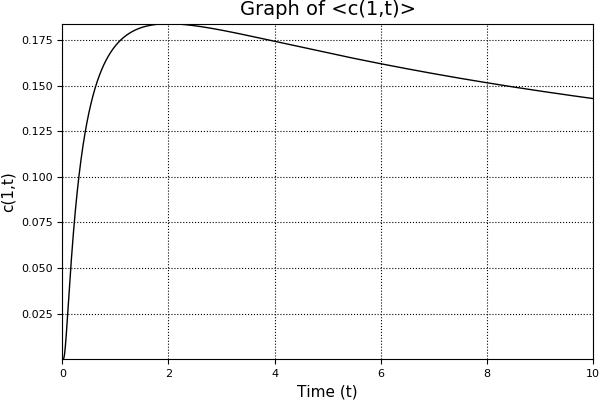

In [80]:
t = collect(0:0.0001:10)
y1 = zeros(length(t))
D = 1.0

for i = 1:length(y1)
    y1[i] = (1.0/sqrt(2.0*D*t[i]))*exp(-1*sqrt(2/(D*t[i])))
end

plot(t,y1,color = "black",legend = false)
title!("Graph of <c(1,t)>")
xlabel!("Time (t)")
ylabel!("c(1,t)")


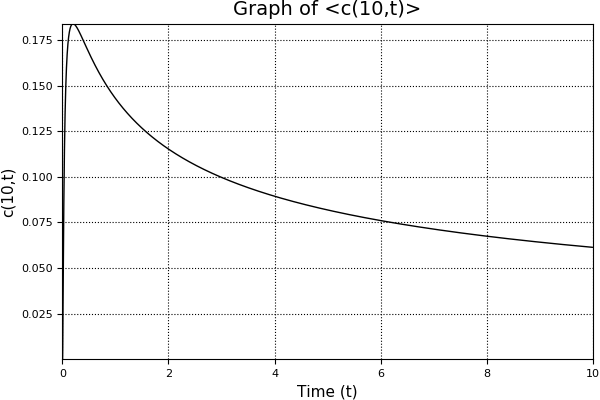

In [79]:
t = collect(0:0.0001:10)
y1 = zeros(length(t))
D = 10.0

for i = 1:length(y1)
    y1[i] = (1.0/sqrt(2.0*D*t[i]))*exp(-1*sqrt(2/(D*t[i])))
end

plot(t,y1,color = "black",legend = false)
title!("Graph of <c(10,t)>")
xlabel!("Time (t)")
ylabel!("c(10,t)")


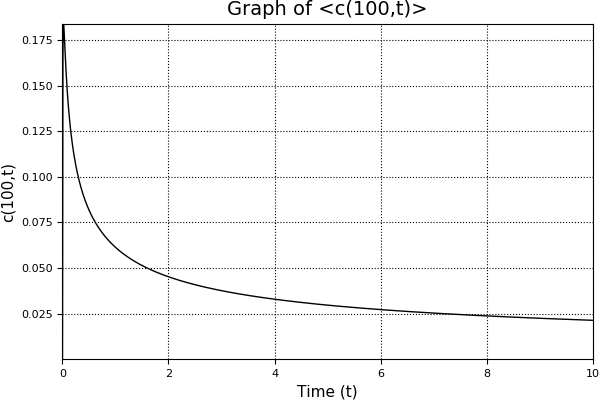

In [78]:
t = collect(0:0.0001:10)
y1 = zeros(length(t))
D = 100.0

for i = 1:length(y1)
    y1[i] = (1.0/sqrt(2.0*D*t[i]))*exp(-1*sqrt(2/(D*t[i])))
end

plot(t,y1,color = "black",legend = false)
title!("Graph of <c(100,t)>")
xlabel!("Time (t)")
ylabel!("c(100,t)")